# Ch9-1. 기초 통계 분석을 해야하는 이유

### 확률 분포의 확인 방법

우리가 아는 건 확률이지만 그의 정확한 분포는 알 수 없다. 정말 특정한 경우를 제외하면 말이다. 

근데 우리는 어떤 함수를 알든, 확률을 알고 있다고 하자. 그럼 다음과 같다. 

- 한 변수가 따르는 확률 분포를 확인했을 때의 효과
    - 현재 수집한 데이터가 어떻게 생겼는지 알 수 있음
    - 새로 데이터가 들어오면 어떻게 들어올 것인지 예상할 수 있음
- 그러나 가지고 있는 데이터는 샘플 데이터이므로 **절대로 정확히 한 변수가 따르는 확률 분포를 알 수 없음.**
우리가 가지고 있는건 절대로 ‘전체'가 될 수 없다. 그저 관측일 뿐. 우리는 확률 분포를 알 수 없음.
- 그렇기에 그래프를 이용하여 확인하거나 적합성 검정을 사용하여 확률 분포를 확인해야 하는데, 이 작업은 굉장히 많은 노력이 필요함 (제대로 하려면 통계쪽 전문가가 해야함)

### 통계 분석 라이브러리 import

`mean()`은 대부분 scipy에서 가져온 함수들이라고 한다.  

In [1]:
import numpy as np
from scipy.stats import *
import pandas as pd

# Ch9-2. 대표 통계량

## 평균

### 산술 평균 (arithmetic mean) 계산
다른 관측치에 비해, 매우 크거나 작은 값에 크게 영향을 받음. = 이상치에 민감함.


In [2]:
x = [1, 2, 3, 4, 5]
print(np.mean(x))
print(np.array(x).mean())
print(pd.Series(x).mean())

3.0
3.0
3.0


In [3]:
# 이진 변수에 대한 평균 : 1의 비율과 같음

x = [1, 0, 0, 0, 1]
print(np.mean(x))

0.4


## 조화 평균 (harmonic mean)

비율 및 변화율 등에 대한 평균을 계산할 때 사용. (데이터의 역수의 산술평균 역수)  
 조화 평균 H는 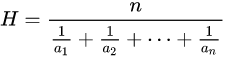
*출처 : https://ko.wikipedia.org/wiki/%EC%A1%B0%ED%99%94_%ED%8F%89%EA%B7%A0*

F score 구할 때 정밀도를 구할 때 사용한다. 

In [4]:
# 산술 평균은 0.3
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
print(len(x) / np.sum(1/x))
print(hmean(x))

0.21897810218978103
0.21897810218978103


## 절사 평균 (truncated mean)

데이터의 범위를 제한하여 해당 범위에 속하는 데이터에 대해서만 평균을 낸 것이다.  
그 값들이 너무 크거나 작아서 평균에 영향을 끼칠 수 있기 떄문이다.  
좀더 안정적인 대표값을 얻을 수 있다. 안정적이지만, 범위($\alpha 에서 1-\alpha$)를 어떻게 설정할 것인지 문제가 있다. 

10% 절사 평균이란 자료의 총 수에서 상위 10%, 하위 10% 에 위치한 상위/하위 값까지 삭제한 뒤 산술 평균을 구한다. 

### 절사 평균이 필요한 이유
평균이 2백만원이고 표준편차가 50만원인 정규 분포를 따르는 소득을 갖는 100명 난수 생성 후,  
소득이 10억원인 사람의 등장한 뒤, 100명의 소득이 200만원에 가까운데 한 명 때문에 대표값인 평균이 1200만원에 달함  

대부분 국가별 소득을 너무 높다고 생각할 수 있는 부분이 바로 일반적인 평균을 썼기 때문인 것이라고...

In [5]:
income = np.random.normal(2000000, 500000, 100) 
print(np.mean(income))

2129337.227354372


In [6]:
income = np.append(income, 10**9) 
print(np.mean(income)) 

12009244.779558783


### 절사 평균 계산 

trim_mean을 사용하여 상위, 하위에서 각각 일정부분 자른다. 0.2 = [20% ~ 80%]  

물론 0.2는 엄청 크기 때문에 함부로 써서는 안되는 양이긴 함.

In [7]:
trim_mean(income, 0.2) 

2133521.1022396074

## 최빈값

A, B, C라는 요소로 구성하여 천 번을 추출하도록 한다. 

In [8]:
x = np.random.choice(['A', 'B', 'C'], 1000) 
x[:10]

array(['C', 'A', 'B', 'A', 'B', 'B', 'B', 'C', 'C', 'B'], dtype='<U1')

In [9]:
# [0]: 최빈값, [1]: 빈도
mode(x) 

ModeResult(mode=array(['C'], dtype='<U1'), count=array([356]))

In [10]:
# 맨 앞에 있는 것이 최빈 값
pd.Series(x).value_counts().index[0] 

'C'

# 별건 아니고...

## 기하 평균 (geometric mean)
추가로 해두고 싶어서 해두는 기하 평균. (참조:https://wikidocs.net/23088)  

산술평균은 합의 평균이고, 기하평균은 곱의 평균이다. 예를 들어 다음 문제를 보자.

두 수 a, b의 기하 평균은 
$$ {\sqrt {a \bullet b}} $$

곱의 평균을 기하 평균이라고 부르는 이유는, 기하의 비례식에서 유래하였기 때문인데, 예를 들어, 반원에서 직각 삼각형의 닮음식은 
$$ a : p = p : b $$

변의 길이가 $a$와 $b$인 직사각형과 넓이가 같은 정사각형의 한변의 길이는 $ \sqrt {ab} $ 이다.



In [12]:
# 산술 평균과 기하 평균
X = [1, 2, 3, 4, 5]
print("arithmetic mean :",np.mean(X))

gm = 1
for i in X:
    gm = gm*i
print("geometric mean :", np.sqrt(gm))

arithmetic mean : 3.0
geometric mean : 10.954451150103322
